# Programación 201

### Ejercicio 1

Carga los datos desde el archivo `netflixtitles.csv` , que puedes encontrar en la carpeta `data`, en un *dataframe*. Este conjunto de datos recoje información sobre películas y séries de TV de Netflix (https://www.kaggle.com/shivamb/netflix-shows) hasta el 2019.  

Muestra el número de filas del *dataframe* y los nombres de las columnas.

*Consideraciones:*

*  Muestra únicamente la información pedida en el enunciado.


In [1]:
# Libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carga del Dataframe
netflix = pd.read_csv("../../../data/netflixtitles.csv")

In [3]:
# Número de filas:
print("- El dataframe 'Netflixtitles' contiene: {} filas".format(len(netflix)))
# Nombre de columnas:
print("- Nombres de las columnas : {}".format(netflix.columns.values))

- El dataframe 'Netflixtitles' contiene: 6234 filas
- Nombres de las columnas : ['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'release_year' 'rating' 'duration' 'listed_in' 'description']


### Ejercicio 2

Agrupa los datos cargados en el ejercicio 1 por **año** y, para cada año, muestra el número total de películas (*Movies*) y series de TV (*TV Show*) por separado. 

**Nota:** Al Notebook de teoría hemos visto cómo calcular la media de una agrupación de datos. Para resolver este ejercicio necesitarás investigar cómo contar (*count*) todos los valores de una columna en una agrupación. Te puede ser de utilidad la función [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) de pandas, la que nos permite aplicar diferentes funciones a una columna en un ```groupby```.


In [4]:
# Agrupamos por año y por tipo sean películas o Tv show y mostramos con la función count los totales
netflix.groupby(["release_year","type"])["type"].count()

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2018          TV Show    417
2019          Movie      400
              TV Show    443
2020          Movie        6
              TV Show     19
Name: type, Length: 115, dtype: int64

In [5]:
# Alternativa usando la funcion aggregate
netflix.groupby(["release_year","type"]).agg({
    "type": "count"
})

type
release_year type         
1925         TV Show     1
1942         Movie       2
1943         Movie       3
1944         Movie       3
1945         Movie       3
...                    ...
2018         TV Show   417
2019         Movie     400
             TV Show   443
2020         Movie       6
             TV Show    19

[115 rows x 1 columns]

### Ejercicio 3

Muestra las películas estrenadas el _2019_ que tienen una duración superior a _100_ minutos. 

**Nota:** Al Notebook de teoría hemos visto operaciones básicas de filtrado. Para resolver este ejercicio necesitarás investigar cómo aplicar condiciones más complejas. 

**Nota 2:** Los valores de la columna de duración (*duration*) son strings, ya que combinan números y letras. Por lo tanto, se tienen que transformar a int una vez se haya construido el subset de datos de películas. Te puede ser de utilidad la función [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) de pandas.
 


In [6]:
netflix.dtypes # Verifico el tipo de variables

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
# Filtro aquellas peliculas que se estrenaron en el año 2019
releases2019 = netflix[(netflix.type == "Movie") & (netflix.release_year == 2019)]

In [9]:
# Transformación a int de la variable `duration`
releases2019["duration"] = releases2019["duration"].astype(int)
# Filtro las películas por aquellas que tienen una duración superior a 100 minutos:
releases2019[(releases2019.duration > 100)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,"September 6, 2019",2019,TV-MA,125,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...
57,81078908,Movie,The World We Make,Brian Baugh,"Caleb Castille, Rose Reid, Kevin Sizemore, Gre...",United States,"September 4, 2019",2019,PG,108,"Dramas, Romantic Movies",A teenage equestrian and a local football play...
102,80231903,Movie,In the Shadow of the Moon,Jim Mickle,"Boyd Holbrook, Michael C. Hall, Cleopatra Cole...",United States,"September 27, 2019",2019,TV-MA,116,"Dramas, Sci-Fi & Fantasy, Thrillers",A Philadelphia detective slowly unravels as he...
109,81177238,Movie,Malaal,Mangesh Hadawale,"Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve...",India,"September 26, 2019",2019,TV-14,133,"International Movies, Romantic Movies",Class divides become thorns in the budding rom...
119,81186758,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 25, 2019",2019,TV-14,146,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
...,...,...,...,...,...,...,...,...,...,...,...,...
5347,81076749,Movie,Ek Ladki Ko Dekha Toh Aisa Laga,Shelly Chopra Dhar,"Anil Kapoor, Sonam Kapoor, Rajkummar Rao, Juhi...",India,"April 2, 2019",2019,TV-14,120,"Comedies, Dramas, International Movies",As her family seeks to marry her off and a hop...
5359,81033430,Movie,Music Teacher,Sarthak Dasgupta,"Manav Kaul, Amrita Bagchi, Divya Dutta, Neena ...",India,"April 19, 2019",2019,TV-14,102,"Dramas, Independent Movies, International Movies",A dejected small-town music teacher grapples w...
5365,81080942,Movie,The Ruthless,Renato De Maria,"Riccardo Scamarcio, Sara Serraiocco, Alessio P...","Italy, France","April 19, 2019",2019,TV-MA,111,"Dramas, International Movies",A rebellious teen grows up to become one of Mi...
5385,81013626,Movie,HOMECOMING: A film by Beyoncé,Beyoncé Knowles-Carter,Beyoncé Knowles-Carter,NaN,"April 17, 2019",2019,TV-MA,138,"Documentaries, Music & Musicals","This intimate, in-depth look at Beyoncé's cele..."


In [8]:
pd.set_option('chained_assignment',None) # Cuando nos salen Advertencias Daniel nos comento que de esta manera podemos desactivarlas 

In [10]:
# Alternativa 1
releases2019[releases2019.duration > 100].title

35                           Article 15
57                    The World We Make
102           In the Shadow of the Moon
109                              Malaal
119                Oh! Baby (Malayalam)
                     ...               
5347    Ek Ladki Ko Dekha Toh Aisa Laga
5359                      Music Teacher
5365                       The Ruthless
5385      HOMECOMING: A film by Beyoncé
5469                                706
Name: title, Length: 134, dtype: object

In [11]:
# Alternativa con loc
releases2019.loc[releases2019.duration > 100, "title"]

35                           Article 15
57                    The World We Make
102           In the Shadow of the Moon
109                              Malaal
119                Oh! Baby (Malayalam)
                     ...               
5347    Ek Ladki Ko Dekha Toh Aisa Laga
5359                      Music Teacher
5365                       The Ruthless
5385      HOMECOMING: A film by Beyoncé
5469                                706
Name: title, Length: 134, dtype: object

### Ejercicio 4

Queremos buscar aquellos países donde se estrenaron más de 10 películas al año. Debes mostrar por pantalla el **año**, el **nombre del país** y el **número total de películas** estrenadas en el año correspondiente.

**Nota**: Además del contenido de los notebooks de teoría, puedes utilizar lo que has aprendido haciendo el ejercicio 2.


In [12]:
# Agrupo las películas del dataset
movies_netflix = netflix[(netflix.type == "Movie")]

`Importante preguntar filtro países donde se estrenaron más de 10 películas`

In [13]:
# Alternativa 1 de agrupamiento 
movies_netflix.groupby(['release_year','country'])['title'].count()

release_year  country                      
1942          United States                    2
1943          United States                    3
1944          United States                    2
              United States, United Kingdom    1
1945          United States                    3
                                              ..
2019          Vietnam                          1
2020          India                            1
              Mexico                           1
              Spain                            1
              United States                    2
Name: title, Length: 1089, dtype: int64

In [14]:
# Alternativa 2 de agrupamiento
movies_netflix[['release_year','country','title']].groupby(['country','release_year']).count()

title
country      release_year       
Argentina    1985              1
             1998              1
             2006              1
             2007              1
             2015              2
...                          ...
Vietnam      2014              1
             2015              1
             2016              1
             2019              1
West Germany 1977              1

[1089 rows x 1 columns]

In [15]:
# Alternativa 3 de agrupamiento
movies_netflix.groupby(['country','release_year'])['country'].count()

country       release_year
Argentina     1985            1
              1998            1
              2006            1
              2007            1
              2015            2
                             ..
Vietnam       2014            1
              2015            1
              2016            1
              2019            1
West Germany  1977            1
Name: country, Length: 1089, dtype: int64

### Ejercicio 5

Crea una copia del dataframe original añadiendo una nueva columna que nos indicará por cada fila la duración de la película. Definimos tres niveles:

- **short** : si la duración es inferior a 90 minutos. 
- **medium** : si la duración está entre 90 y 150 minutos.
- **long** : si la duración es superior a 150 minutos.

Muestra por pantalla aquellas filas que correspondan a una duración corta ( _short_ ). 

**Nota:** pandas nos ofrece principalmente tres maneras de añadir nuevas columnas a un dataframe existente. Cualquiera de las tres formas son válidas para resolver este ejercicio. Podéis buscar en Internet cómo añadir columnas a un dataframe de pandas, ya que la documentación presenta los tres métodos de forma separada.


 [Creación de columnas basadas en nuevas condiciones Pandas - Método select](https://www.delftstack.com/es/howto/python-pandas/how-to-create-dataframe-column-based-on-given-condition-in-pandas/)

In [16]:
# Copia del dataframe:
movie_levels = movies_netflix.copy()

In [17]:
# Duration se encuentraba como tipo object
movie_levels["duration"] = movie_levels["duration"].astype(int) 

In [18]:
# np.select:
# Definimos las condiciones:

condition = [
    (movie_levels["duration"] <90),
    (movie_levels["duration"] >=90) & (movie_levels["duration"] <=150),
    (movie_levels["duration"] >150)
]
choice = ["short", "medium", "long"]
# La nueva columna que contendrá los niveles de duración se llamará `levels`
movie_levels["levels"] = np.select(condition, choice)

In [19]:
# Filtro por películas de duración menor a 90 minutos o "short"
movie_levels[(movie_levels.levels == "short")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,levels
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,short
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...,short
12,80182480,Movie,Krish Trish and Baltiboy,NaN,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2009,TV-Y7,58,Children & Family Movies,"A team of minstrels, including a monkey, cat a...",short
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2013,TV-Y7,62,Children & Family Movies,"An artisan is cheated of his payment, a lion o...",short
14,80182596,Movie,Krish Trish and Baltiboy: Best Friends Forever,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Deepak...",NaN,"September 8, 2017",2016,TV-Y,65,Children & Family Movies,"A cat, monkey and donkey team up to narrate fo...",short
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,80171439,Movie,The Human Factor: The Untold Story of the Bomb...,Rudradeep Bhattacharjee,NaN,India,"April 1, 2017",2013,TV-PG,53,"Documentaries, International Movies, Music & M...",A family of Parsi musicians collectively works...,short
5574,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",2016,TV-MA,81,"Dramas, International Movies",After spending much of his adult life in New Y...,short
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...,short
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,short


### Ejercicio 6

En este ejercicio trabajaremos con el dataset de Netflix, pero analizando las series de TV. Muestra un gráfico de barras con el número de series de TV americanas agrupadas por categoría (*listed_in*).


Consideraciones:

- Debes mostrar los datos de manera horizontal (barras horizontales).
- El eje de las Y debe incluir las etiquetas de las categorías de las series de TV.
- Debe incluir un texto con el número de series por cada categoría del gráfico. El texto debería estar situado a la derecha de cada barra.

**Nota**: En el Notebook de teoría hemos visto cómo mostrar gráficos lineares simples con el matplotlib. Para este ejercicio explora las funcionalidades que presenta la librería pandas para generar gráficos a partir de dataframes. También pueden ser de utilidad las funciones [text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) o [annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) para mostrar el número de series al lado de cada barra. 


In [20]:
# Realizo una agrupación por Tv shows y por país: Estados Unidos
tv = netflix[(netflix.type == "TV Show") & (netflix.country == "United States")]

Text(0.5, 1.0, 'Número de series de Tv americanas agrupadas por categoría')

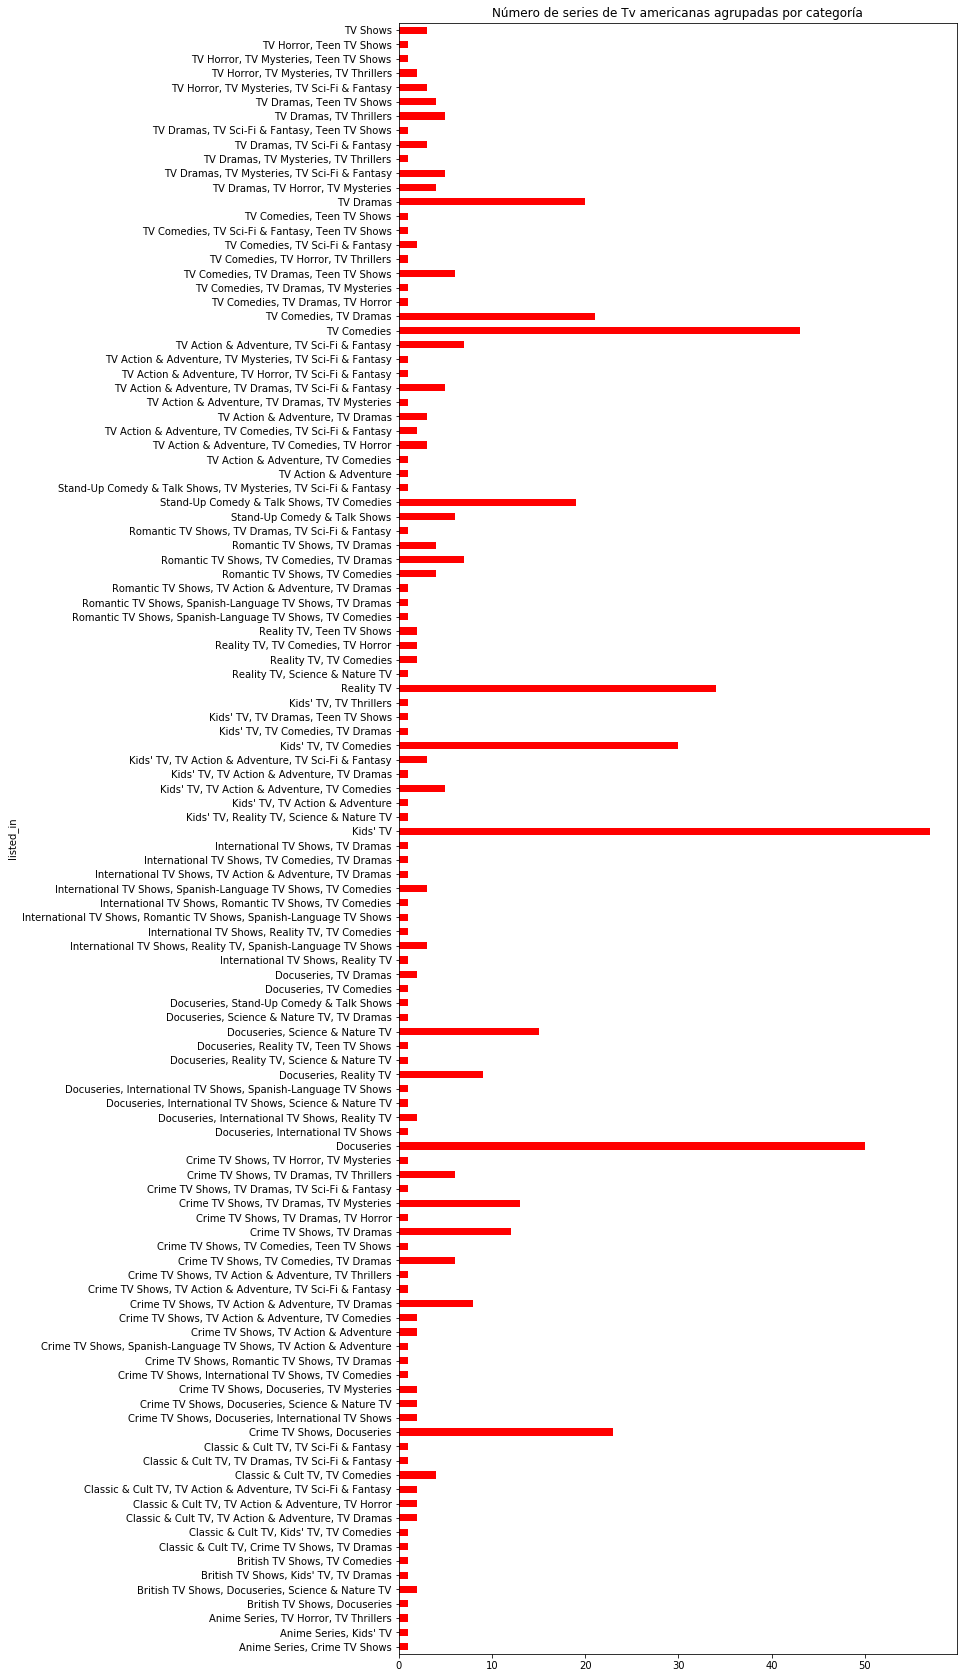

In [21]:
tv.groupby("listed_in")["listed_in"].count().plot(kind="barh",
                                                  color="red",
                                                  figsize=(10,30))
plt.title("Número de series de Tv americanas agrupadas por categoría")
# añado el grid plt.grid(True)

`preguntar por la inclusión de valores de texto con el número de series por categoría`

### Ejercicio Opcional

Python es un lenguaje de programación muy utilizado en el procesamiento de imágenes. En este ejercicio veremos una aplicación de detección de elementos en una imagen de microscopía de escaneo (en inglés: Scanning Element Microscopy (SEM)).

En esta imagen se puede ver una muestra de vidrio (gris claro) con algunas burbujas (elementos negros) y granos de arena (gris oscuro). Queremos ser capaces de detectar los diferentes elementos de la muestra a partir de la imagen.

Una imagen se puede ver como una matriz bidimensional donde cada elemento de la matriz corresponde al valor de un pixel de la imagen. Por ejemplo, si miramos la matriz de la imagen que os proporcionamos, veremos valores que van de 0 a 255. Así pues, para distinguir los diferentes elementos de la muestra de vidrio, nos tendremos que fijar en el nivel de gris de los píxeles de la imagen a través del histograma. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> 


Parte A: 

* Para poder identificar mejor los elementos de la muestra de vidrio, primero hemos aplicado un filtro de mediana para reducir el ruido. Grafica ahora la distribución de los píxeles de la imagen inicial y la imagen filtrada. ¿Qué diferencia puedes apreciar entre ambas distribuciones?

**Nota:** Utiliza la función [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) de la librería Seaborn para visualizar la distribución de los valores píxeles de la imagen.

Parte B: 

* Utilizando los valores del distribution plot de la imagen filtrada, determina unos umbrales que permitan diferenciar los píxeles de arena, los píxeles de vidrio y los píxeles de burbuja.

* Una vez que hayas definido los umbrales, muestra por pantalla una imagen donde cada uno de los elementos esté en un color diferente. 


In [ ]:
# Respuesta